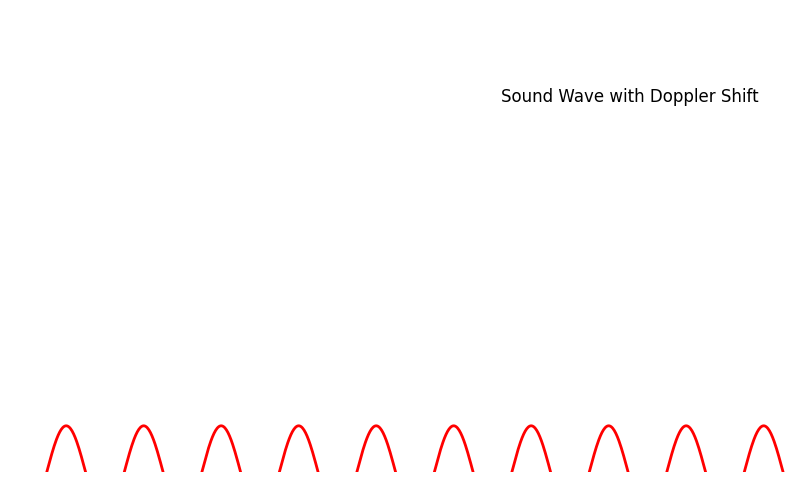

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Define ray diagram and microscope transition functions

# --- 1. Ray Diagram Animation ---
def ray_diagram(frame):
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Ray diagram parameters
    focal_length = 3
    object_distance = 5

    # Define object position
    object_position = 2

    # Rays passing through the convex lens
    rays = np.linspace(object_position, object_distance, 5)
    for x in rays:
        ax.plot([x, 5], [5, 5], color='blue', lw=1)  # Rays traveling from object to lens

    # Lens representation (circle)
    lens = patches.Circle((5, 5), radius=0.5, edgecolor='black', facecolor='none', lw=2)
    ax.add_patch(lens)

    # Focal points
    ax.scatter([5 + focal_length, 5 - focal_length], [5, 5], color='red', zorder=5)
    ax.text(5 + focal_length, 5.2, "F", ha='center', fontsize=12)
    ax.text(5 - focal_length, 5.2, "F", ha='center', fontsize=12)

    # Image formation
    if frame > 40:
        image_position = (object_position * focal_length) / (object_position - focal_length)
        ax.scatter(image_position, 5, color='green', s=100, zorder=5)
        ax.text(image_position, 5.2, "Image", ha='center', fontsize=12)

    ax.text(5, 4.5, "Ray Diagram", fontsize=12, ha='center')

# --- 2. Transition to Microscope ---
def microscope_transition(frame):
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Show microscope as an ellipse lens system
    ax.plot([2, 8], [6, 6], color='black', lw=2)  # Body of the microscope
    ax.scatter([5], [6], color='blue', s=500, zorder=3)  # Objective lens

    # Animation: Zoom-in effect for microscope
    if frame > 80:
        ax.imshow(np.array(mpimg.imread("cell_image.jpg")), extent=[2, 8, 0, 10])  # Cell image shown
        ax.text(5, 9, "Zooming Into a Cell", fontsize=12, ha='center')
    else:
        ax.text(5, 9, "Microscope Zooming In", fontsize=12, ha='center')

# --- 3. Update Function ---
def update(frame):
    if frame < 40:
        ray_diagram(frame)
    else:
        microscope_transition(frame)

# Create the animation
ani = FuncAnimation(fig, update, frames=120, interval=100, repeat=False)

# Save the animation
ani.save("ray_diagram_microscope_zoom.mp4", writer="ffmpeg", fps=30)

# Show the animation
plt.show()
